In [0]:
import torch
#from engine import train_one_epoch, evaluate
#import utils
#import transforms as T
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch.utils.data
from PIL import Image, ImageFile
import pandas as pd
from tqdm import tqdm
from torchvision.transforms import functional as F

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def _get_instance_segmentation_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model
  

In [0]:
import collections
import os
import numpy as np

In [0]:
root_dir='/content/gdrive/My Drive/NWPU VHR-10 dataset/ground truth'
imagefiles=os.listdir(os.path.join(root_dir))
imagefiles.sort()

print(len(imagefiles)),print(imagefiles)

650
['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.

(None, None)

In [0]:
# print(type(imagefiles[0]))
# img_path=os.path.join(root_dir, imagefiles[0])
# img_path

imagefiles[436]

'437.txt'

In [0]:
#li=list()


#for i in range(len(imagefiles)):
#f=open(os.path.join(root_dir, imagefiles[i]))
#x=f.read()
#x=x.replace('(','')
#x=x.replace(')','')
#l=[i for i in x.split('\n')]
#li.append(l)
#f.close()
    
    
    


In [0]:
#f=open(os.path.join(root_dir, imagefiles[439]))
#x=f.read()
#x=x.replace('(','')
#x=x.replace(')','')
#x=x.replace("'",'')
#l=[i for i in x.split('\n')]
#l=l[:-1]
#l_new=[]
#for i in range(len(l)):
#  li=[int(j) for j in l[i].split(',')]
#  l_new.append(li)
  
# l_new

# boxes=[]
# label=[]

# for i in range(len(l_new)):
#   boxes.append(l_new[i][:-1])
#   label.append(l_new[i][-1])
  
# print(boxes), print(label)

In [0]:
# areas=[]
# for i in range(len(boxes)):
#   temp=boxes[i]
#   x1,y1,x2,y2= temp[0], temp[1],temp[2],temp[3]
#   area=(x2-x1)*(y2-y1)
#   area= abs(area)
#   areas.append(area)
  
  
  
# print(areas),print( len(boxes))

In [0]:
class OpenDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir,gt_dir,root_dir,transforms=None):
        self.transforms = transforms
        self.root_dir=root_dir
        self.gt_dir=gt_dir
        self.image_dir = image_dir
        self.imagefiles=[os.listdir(os.path.join(self.image_dir))]
        self.imagefiles[0].sort()
        self.ground_truth_files=[os.listdir(os.path.join(self.gt_dir))]
        self.ground_truth_files[0].sort()
   
        #self.image_info = collections.defaultdict(dict)
        
        # Filling up image_info is left as an exercise to the reader
        

    def __getitem__(self, idx):
        # load images ad masks
        temp=self.imagefiles[0][idx]
        img_path=os.path.join(self.image_dir, str(temp))
        img = Image.open(img_path).convert("RGB")
        #img = img.resize((self.width, self.height), resample=Image.BILINEAR)
        
        gt_path=os.path.join(self.gt_dir, self.ground_truth_files[0][idx])
        f=open(gt_path) #           os.path.join(self.image_dir, self.imagefiles[0][idx]))
        x=f.read()
        x=x.replace('(','')
        x=x.replace(')','')
        x=x.replace("'",'')
        l=[i for i in x.split('\n')]
        l=l[:-1]
        l_new=[]
        for i in range(len(l)):
          li=[int(j) for j in l[i].split(',')]
          l_new.append(li)
  
        l_new
    
        boxes=[]
        labels=[]

        for i in range(len(l_new)):
          boxes.append(l_new[i][:-1])
          labels.append(l_new[i][-1])
          
        
        
          
          
        areas=[]
        for i in range(len(boxes)):
          temp=boxes[i]
          x1,y1,x2,y2= temp[0], temp[1],temp[2],temp[3]
          area=(x2-x1)*(y2-y1)
          area= abs(area)
          areas.append(area)
        
    
                
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])
        num_objs= len(boxes)
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        areas = torch.as_tensor(areas, dtype=torch.float32)
        # processing part and extraction of boxes is left as an exercise to the reader

        
        
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = areas
        target["iscrowd"] = iscrowd
        
        

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        l=len(self.imagefiles[0])
        return l

In [0]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 5025 (delta 50), reused 53 (delta 22), pack-reused 4920
Receiving objects: 100% (5025/5025), 9.17 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (3280/3280), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be37608 version check against PyTorch's CUDA version


In [0]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [0]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [0]:
data=OpenDataset('/content/gdrive/My Drive/NWPU VHR-10 dataset/positive image set','/content/gdrive/My Drive/NWPU VHR-10 dataset/ground truth','/content/gdrive/My Drive/NWPU VHR-10 dataset',get_transform(train=True))
#data_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)
print(len(data))
torch.manual_seed(1)
indices = torch.randperm(len(data)).tolist()
dataset = torch.utils.data.Subset(data, indices[:-50])
dataset_test = torch.utils.data.Subset(data, indices[-50:])

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=2, shuffle=False,num_workers=4,
    collate_fn=utils.collate_fn)

650


In [0]:
len(dataset), len(dataset_test)

(600, 50)

In [0]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 11

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 167502836/167502836 [00:03<00:00, 50920583.98it/s]


In [0]:
# let's train it for 10 epochs
num_epochs = 50

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

Epoch: [0]  [  0/300]  eta: 0:22:28  lr: 0.000022  loss: 1.8396 (1.8396)  loss_classifier: 1.4913 (1.4913)  loss_box_reg: 0.1790 (0.1790)  loss_objectness: 0.1469 (0.1469)  loss_rpn_box_reg: 0.0224 (0.0224)  time: 4.4935  data: 2.8246  max mem: 6622
Epoch: [0]  [ 10/300]  eta: 0:09:06  lr: 0.000189  loss: 1.6097 (1.5915)  loss_classifier: 1.2756 (1.2037)  loss_box_reg: 0.0834 (0.1230)  loss_objectness: 0.1469 (0.2264)  loss_rpn_box_reg: 0.0273 (0.0384)  time: 1.8830  data: 0.2636  max mem: 7909
Epoch: [0]  [ 20/300]  eta: 0:08:13  lr: 0.000356  loss: 1.0233 (1.1599)  loss_classifier: 0.7278 (0.8306)  loss_box_reg: 0.1024 (0.1392)  loss_objectness: 0.1023 (0.1612)  loss_rpn_box_reg: 0.0228 (0.0290)  time: 1.6277  data: 0.0085  max mem: 7909
Epoch: [0]  [ 30/300]  eta: 0:07:43  lr: 0.000523  loss: 0.5822 (1.0268)  loss_classifier: 0.3771 (0.7159)  loss_box_reg: 0.1224 (0.1507)  loss_objectness: 0.0405 (0.1320)  loss_rpn_box_reg: 0.0167 (0.0281)  time: 1.6227  data: 0.0094  max mem: 7909


In [0]:
# pick one image from the test set
img, _ = dataset_test[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [0]:
prediction

[{'boxes': tensor([[185.0272,  30.0880, 354.4373, 253.5579]], device='cuda:0'),
  'labels': tensor([7], device='cuda:0'),
  'scores': tensor([0.9971], device='cuda:0')}]

In [0]:
pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(prediction[0]['labels'].cpu().numpy())]
pred_class

['ground track field']

In [0]:
pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(prediction[0]['boxes'].cpu().detach().numpy())]
pred_boxes

[[(185.02716, 30.088017), (354.43726, 253.55788)]]

In [0]:
model.eval()
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'airplane', 'ship', 'storage tank', 'baseballdiamond', 'tennis court', 'basketball court', 'ground track field', 'harbor', 'bridge', 'vehicle'
]

In [0]:
import torchvision.transforms as T2
import cv2
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform2 = T2.Compose([T2.ToTensor()]) # Defing PyTorch Transform
  img = transform2(img) # Apply the transform to the image
  pred = model([img.to(device)]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].cpu().numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].cpu().detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].cpu().detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [0]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1, text_th=1):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(10,20)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [0]:
from PIL import Image
import matplotlib.pyplot as plt

--2019-08-17 14:21:59--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2305852 (2.2M) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]   2.20M  --.-KB/s    in 0.08s   

2019-08-17 14:21:59 (29.2 MB/s) - ‘car.jpg’ saved [2305852/2305852]



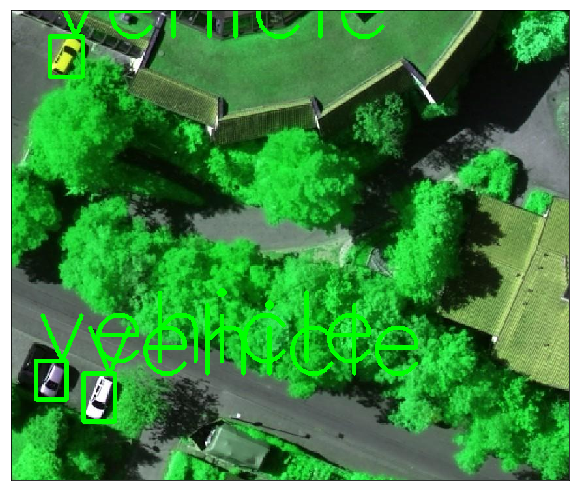

In [0]:
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg
object_detection_api('/content/gdrive/My Drive/NWPU VHR-10 dataset/positive image set/400.jpg', rect_th=6, text_th=5, text_size=5)